# **Rock Paper Scissors Classifier**

program ini berfungsi membedakan gambar bentuk tangan menjadi kategori gunting kertas batu

# **Get Data**

Kode di bawah ini untuk mengupload data dan ekstraksi data

In [ ]:
!wget https://dicodingacademy.blob.core.windows.net/picodiploma\
/ml_pemula_academy/rockpaperscissors.zip

--2021-07-03 14:59:57--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip.1’

rockpaperscissors.z  31%[=====>              ]  96.01M  8.26MB/s    eta 31s    ^C


In [ ]:
from zipfile import ZipFile
nama_file = 'rockpaperscissors.zip'

with ZipFile(nama_file, 'r') as zip:
  zip.extractall()
  print('selesai')

selesai


kode dibawah ini mentransformasi data menjadi tabel dataframe

In [ ]:
import os

mypath = "rockpaperscissors"
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)


In [ ]:
import pandas as pd

df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df = df[df.duplicated(subset=['tag'], keep=False)] # menghilangkan unique tag
df.groupby(['tag']).size() # cek isi folder

tag
paper       1424
rock        1452
scissors    1500
dtype: int64

In [ ]:
df # cek data

,path,file_name,tag
1,rockpaperscissors/paper/JFOcfFSm3Ul0Xkha.png,JFOcfFSm3Ul0Xkha.png,paper
2,rockpaperscissors/paper/oWI7JL85eXDhRFcV.png,oWI7JL85eXDhRFcV.png,paper
3,rockpaperscissors/paper/prCirglnpqZ4KRmM.png,prCirglnpqZ4KRmM.png,paper
4,rockpaperscissors/paper/CnRjJejRPD3QmYTl.png,CnRjJejRPD3QmYTl.png,paper
5,rockpaperscissors/paper/PwkqvoT0noMITNaF.png,PwkqvoT0noMITNaF.png,paper
...,...,...,...
4373,rockpaperscissors/rock/GRUlZRON6TdcmAOe.png,GRUlZRON6TdcmAOe.png,rock
4374,rockpaperscissors/rock/H3USQGpRNkk6KyXa.png,H3USQGpRNkk6KyXa.png,rock
4375,rockpaperscissors/rock/XFCJ1H5zoEXgE5CX.png,XFCJ1H5zoEXgE5CX.png,rock
4376,rockpaperscissors/rock/PYmGQFC1zj7mP3vh.png,PYmGQFC1zj7mP3vh.png,rock


# **Data preproccesing**

memisahkan data menjadi train dan val data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= df['path']
y= df['tag']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.4, random_state=200)


In [ ]:
df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})

In [ ]:
# melihat proporsi pada masing masing set apakah sudah ok atau masih ada yang ingin diubah
df_all = df_tr.append([df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')


set         tag     
train       paper       858
            rock        894
            scissors    873
validation  paper       566
            rock        558
            scissors    627
dtype: int64 




In [ ]:
import shutil
from tqdm.notebook import tqdm as tq

In [ ]:
dataset_path = "dataset/"

In [ ]:
for index, row in tq(df_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

image augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        "dataset/train",  # direktori data latih
        target_size=(50, 50),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')
 
validation_generator = val_datagen.flow_from_directory(
        "dataset/validation", # direktori data validasi
        target_size=(50, 50), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical')

Found 1822 images belonging to 3 classes.
Found 1385 images belonging to 3 classes.


# **Train model**

create model

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(50, 50, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:

# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss = 'categorical_crossentropy', 
              optimizer='rmsprop', metrics=['accuracy'])

fungsi callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85):
      print("\nAkurasi telah mencapai >85%!")
      self.model.stop_training = True
callbacks = myCallback()

Train model

In [ ]:
# latih model dengan model.fit 
history = model.fit(
      train_generator, 
      steps_per_epoch=30,
      epochs=30, 
      validation_data=validation_generator, 
      validation_steps=5,  
      verbose=2,
      callbacks=callbacks)

Epoch 1/30
30/30 - 3s - loss: 1.1135 - accuracy: 0.3333 - val_loss: 1.0960 - val_accuracy: 0.3000
Epoch 2/30
30/30 - 1s - loss: 1.1171 - accuracy: 0.3750 - val_loss: 1.0910 - val_accuracy: 0.6000
Epoch 3/30
30/30 - 1s - loss: 1.1613 - accuracy: 0.3167 - val_loss: 1.0168 - val_accuracy: 0.7000
Epoch 4/30
30/30 - 1s - loss: 0.9725 - accuracy: 0.5417 - val_loss: 0.6908 - val_accuracy: 0.8000
Epoch 5/30
30/30 - 1s - loss: 0.7565 - accuracy: 0.6000 - val_loss: 0.7875 - val_accuracy: 0.7000
Epoch 6/30
30/30 - 1s - loss: 0.8020 - accuracy: 0.6667 - val_loss: 0.4099 - val_accuracy: 0.9500
Epoch 7/30
30/30 - 1s - loss: 0.5269 - accuracy: 0.7833 - val_loss: 0.2973 - val_accuracy: 0.9000
Epoch 8/30
30/30 - 1s - loss: 0.5485 - accuracy: 0.7917 - val_loss: 0.3423 - val_accuracy: 0.9000
Epoch 9/30
30/30 - 1s - loss: 0.5388 - accuracy: 0.7542 - val_loss: 0.9843 - val_accuracy: 0.5500
Epoch 10/30
30/30 - 1s - loss: 0.5491 - accuracy: 0.7917 - val_loss: 0.7797 - val_accuracy: 0.7500
Epoch 11/30
30/30 -

kode dibawah untuk melihat performa model

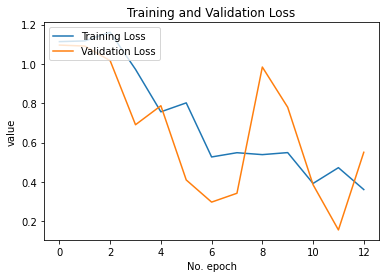

In [ ]:
from matplotlib import pyplot as plt

# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()


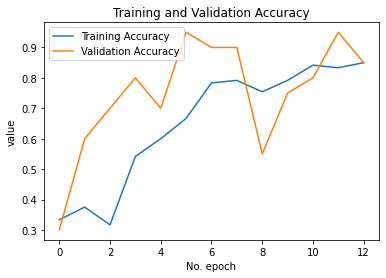

In [ ]:
# Plot history: MSE
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# **Test Model**

Saving tangan_gunting.png to tangan_gunting.png
jawaban : gunting


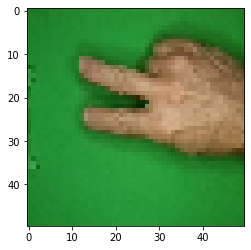

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(50,50))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
if classes[0][0] == 1 :
  print("jawaban : kertas")

elif classes[0][1] == 1 :
  print("jawaban : batu")

else:
  print("jawaban : gunting")